<a href="https://colab.research.google.com/github/pranav168/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA Hotel Booking Analysis
##Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits import mplot3d
from datetime import datetime
!pip install colorama
from colorama import Fore
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.describe()                                                                   #minimum adr is -ve which is not possible lets look into it     

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
print(df[df.adr<=0].shape) # there are a lot of anomalies in data based on adr because it is not possible that a person is charged 0 dollars for his/her stay until he has some membership which is not displayed in data thus i will remove them
df=df[df.adr>0]

(1960, 32)


In [10]:
column_list=['country','hotel', 'is_canceled', 'lead_time', 'arrival_date_year',                              #Forming a counting list with top 10 contributors 
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']
count_dataset=pd.DataFrame()
distinct_features=[]                                                                                          #Empty list to know the number of distict features,sum of all these values, and sum of values top 10 comprises
for i in column_list:                                                                                               
  count_dataset[i]= pd.Series(df[i].value_counts().sort_values(ascending=False).head(10).index)      
  count_dataset[f'{i}_count']=pd.Series(df[i].value_counts().sort_values(ascending=False).head(10).values).astype('int')   
  distinct_features.append((len(df[i].value_counts().index),df[i].value_counts().sum(),df[i].value_counts().sort_values(ascending=False).head(10).sum())) 
final_tally=list(zip(column_list,distinct_features))                                                           #Zipping with column_list
count_dataset   
col_ref={}  
for i in column_list:
  if i in ['children','country','agent','company']:                                                           #colur red shows the features having some Nan
    col_ref[i]='background-color: red'  
  else:
    col_ref[i]='background-color: blue'                                                                       #colur blue shows the features 
  temp=f'{i}_count'
  col_ref[temp]='background-color: green'                                                                     #colur blue shows the count
def Nan_as_black(val):
  if str(val)=='nan':
    color = 'black'
    return 'color: %s' % color
count_dataset=count_dataset.style.apply(lambda x: pd.DataFrame(col_ref, index=count_dataset.index, columns=count_dataset.columns).fillna(''), axis=None).highlight_null('black').applymap(Nan_as_black)
count_dataset

,country,country_count,hotel,hotel_count,is_canceled,is_canceled_count,lead_time,lead_time_count,arrival_date_year,arrival_date_year_count,arrival_date_month,arrival_date_month_count,arrival_date_week_number,arrival_date_week_number_count,arrival_date_day_of_month,arrival_date_day_of_month_count,stays_in_weekend_nights,stays_in_weekend_nights_count,stays_in_week_nights,stays_in_week_nights_count,adults,adults_count,children,children_count,babies,babies_count,meal,meal_count,market_segment,market_segment_count,distribution_channel,distribution_channel_count,is_repeated_guest,is_repeated_guest_count,previous_cancellations,previous_cancellations_count,previous_bookings_not_canceled,previous_bookings_not_canceled_count,reserved_room_type,reserved_room_type_count,assigned_room_type,assigned_room_type_count,booking_changes,booking_changes_count,deposit_type,deposit_type_count,agent,agent_count,company,company_count,days_in_waiting_list,days_in_waiting_list_count,customer_type,customer_type_count,adr,adr_count,required_car_parking_spaces,required_car_parking_spaces_count,total_of_special_requests,total_of_special_requests_count,reservation_status,reservation_status_count,reservation_status_date,reservation_status_date_count
0,PRT,47040,City Hotel,78122.000000,0.000000,73419.000000,0,5769,2016.000000,55789.000000,August,13711,33,3544,17,4318,0,50499,2,33348,2.000000,88780.000000,0.000000,108928.000000,0.000000,116538.000000,BB,90814.000000,Online TA,56110.000000,TA/TO,96913.000000,0.000000,114157.000000,0,111038,0,114085,A,84573.000000,A,73211,0,99902,No Deposit,102681.000000,9.000000,31858,40.000000,920,0,113764,Transient,88163.000000,62.000000,3754,0.000000,110122.000000,0.000000,69140.000000,Check-Out,73419.000000,2015-10-21,1454
1,GBR,12055,Resort Hotel,39308.000000,1.000000,44011.000000,1,3285,2017.000000,40231.000000,July,12491,30,3030,5,4243,2,33150,1,29753,1.000000,22166.000000,1.000000,4807.000000,1.000000,875.000000,HB,14262.000000,Offline TA/TO,23887.000000,Direct,13838.000000,1.000000,3273.000000,1,6005,1,1446,D,19005.000000,D,25000,1,12324,Non Refund,14587.000000,240.000000,13788,223.000000,771,39,227,Transient-Party,24671.000000,75.000000,2715,1.000000,7275.000000,1.000000,32727.000000,Canceled,42830.000000,2015-07-06,803
2,FRA,10360,nan,nan,nan,nan,2,1991,2015.000000,21410.000000,May,11611,34,3015,15,4123,1,30361,3,22167,3.000000,6176.000000,2.000000,3615.000000,2.000000,15.000000,SC,10441.000000,Groups,19558.000000,Corporate,6485.000000,nan,nan,2,97,2,549,E,6423.000000,E,7687,2,3710,Refundable,162.000000,1.000000,7078,67.000000,267,58,164,Contract,4052.000000,90.000000,2473,2.000000,28.000000,2.000000,12763.000000,No-Show,1181.000000,2016-11-25,787
3,ESP,8489,nan,nan,nan,nan,3,1741,nan,nan,April,10953,32,2997,25,4113,4,1844,5,11035,0.000000,248.000000,3.000000,75.000000,9.000000,1.000000,Undefined,1131.000000,Direct,12366.000000,GDS,189.000000,nan,nan,3,58,3,309,F,2824.000000,F,3646,3,900,nan,nan,14.000000,3621,153.000000,208,44,141,Group,544.000000,65.000000,2418,3.000000,3.000000,3.000000,2436.000000,nan,nan,2015-01-01,763
4,DEU,7246,nan,nan,nan,nan,4,1646,nan,nan,October,10929,18,2895,26,4088,3,1244,4,9514,4.000000,60.000000,10.000000,1.000000,10.000000,1.000000,FB,782.000000,Corporate,5213.000000,Undefined,5.000000,nan,nan,24,48,4,215,G,2006.000000,G,2454,4,357,nan,nan,7.000000,3517,174.000000,146,31,127,nan,nan,80.000000,1889,8.000000,2.000000,4.000000,324.000000,nan,nan,2016-01-18,623
5,ITA,3749,nan,nan,nan,nan,5,1503,nan,nan,June,10819,28,2814,9,4024,6,152,0,6807,nan,nan,nan,nan,nan,nan,nan,nan,Aviation,231.000000,nan,nan,nan,nan,11,35,5,166,B,1085.000000,C,2326,5,109,nan,nan,6.000000,3210,219.000000,138,35,96,nan,nan,95.000000,1661,nan,nan,5.000000,40.000000,nan,nan,2015-07-02,469
6,IRL,3369,nan,nan,nan,nan,6,1374,nan,nan,September,10351,21,2791,16,4023,5,77,6,1487,nan,nan,nan,nan,nan,nan,nan,nan,Complementary,63.000000,nan,nan,nan,nan,26,26,6,106,C,913.000000,B,2095,6,58,nan,nan,250.000000,2856,281.000000,135,

In [11]:
final_tally

[('country', (177, 116963, 98953)),
 ('hotel', (2, 117430, 117430)),
 ('is_canceled', (2, 117430, 117430)),
 ('lead_time', (478, 117430, 20778)),
 ('arrival_date_year', (3, 117430, 117430)),
 ('arrival_date_month', (12, 117430, 105068)),
 ('arrival_date_week_number', (53, 117430, 29345)),
 ('arrival_date_day_of_month', (31, 117430, 40958)),
 ('stays_in_weekend_nights', (16, 117430, 117412)),
 ('stays_in_week_nights', (32, 117430, 116812)),
 ('adults', (5, 117430, 117430)),
 ('children', (5, 117426, 117426)),
 ('babies', (5, 117430, 117430)),
 ('meal', (5, 117430, 117430)),
 ('market_segment', (8, 117430, 117430)),
 ('distribution_channel', (5, 117430, 117430)),
 ('is_repeated_guest', (2, 117430, 117430)),
 ('previous_cancellations', (15, 117430, 117373)),
 ('previous_bookings_not_canceled', (73, 117430, 117072)),
 ('reserved_room_type', (9, 117430, 117430)),
 ('assigned_room_type', (11, 117430, 117429)),
 ('booking_changes', (19, 117430, 117407)),
 ('deposit_type', (3, 117430, 117430))

In [12]:
df.children[df['children'].isna()]=0                                            # will replace 4 Nan values for children by 0 as it wont affect our data in any way    
try:
  df.drop('company',axis=1,inplace=True)                                        # company data is so less that it is almost non reproducible, if reproduced could lead to wrong interpretations,and their are no basis on which clusters could be formed thus i will drop the entire columns
except:
  pass
top5_country=df['country'].value_counts().sort_values(ascending=False).head(5)  # for countries i will distribute the values  between top 5 as they hold exclusive dominance usnig random forest
top30_agents=df['agent'].value_counts().sort_values(ascending=False).head(5)    # for agents i will distribute the values between top 5 as they hold exclusive dominance usnig random forest
print(top5_country.sum())
print(top30_agents.sum())

85190
59862


In [13]:
df_top5_country=df[(df['country']=='GBR') | (df['country']=='PRT')| (df['country']=='FRA')| (df['country']=='ESP')| (df['country']=='DEU')] 
nan_country=df[df['country'].isna()]
'''-------------------------------------------------------------------------------------------------------------------------predicting countries----------------------------'''
def country2int(x):
  country_list=['PRT','GBR','FRA','ESP','DEU']
  count=0
  for i in country_list:
    count+=1
    if x==i:
      return count
    
df_top5_country['country']=df_top5_country['country'].apply(lambda x :country2int(x))
X_train=df_top5_country[df_top5_country.describe().columns].drop(['country','agent'],axis=1)
y_train=df_top5_country['country']
X_test= nan_country[nan_country.describe().columns].drop(['agent'],axis=1)
def RandomForest_model(X_train,y_train,X_test):
  model=RandomForestClassifier(n_estimators=100,max_depth=20,random_state=0)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  return y_pred
y_pred=RandomForest_model(X_train,y_train,X_test)
nan_country['country']=y_pred
def int2country(x):
  country_list=['PRT','GBR','FRA','ESP','DEU']
  for i in range(1,6):
    if str(x)==str(i):
      return country_list[i-1]
nan_country['country']=nan_country['country'].apply(lambda x : int2country(x))
nan_country.country.value_counts()
for i in nan_country.index:
    df.loc[i]=nan_country.loc[i] 


In [14]:
df_top5_agent=df[(df['agent']==9) | (df['agent']==240)| (df['agent']==1)| (df['agent']==14)| (df['agent']==7)] 
nan_agent=df[df['agent'].isna()]
'''-------------------------------------------------------------------------------------------------------------------------predicting agents----------------------------'''
X_train=df_top5_agent[df_top5_agent.describe().columns].drop(['agent'],axis=1)
y_train=df_top5_agent['agent']
X_test= nan_agent[nan_agent.describe().columns].drop(['agent'],axis=1)
y_pred=RandomForest_model(X_train,y_train,X_test)
nan_agent['agent']=y_pred
print(nan_agent.agent.value_counts())
index_list=[]
for i in nan_agent.index:
  index_list.append(i)
df.loc[index_list]=nan_agent.loc[index_list] 

240.0    7260
9.0      6653
14.0      538
7.0       482
1.0       458
Name: agent, dtype: int64


In [15]:
df.isna().sum()                                                                 #no null values are their

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

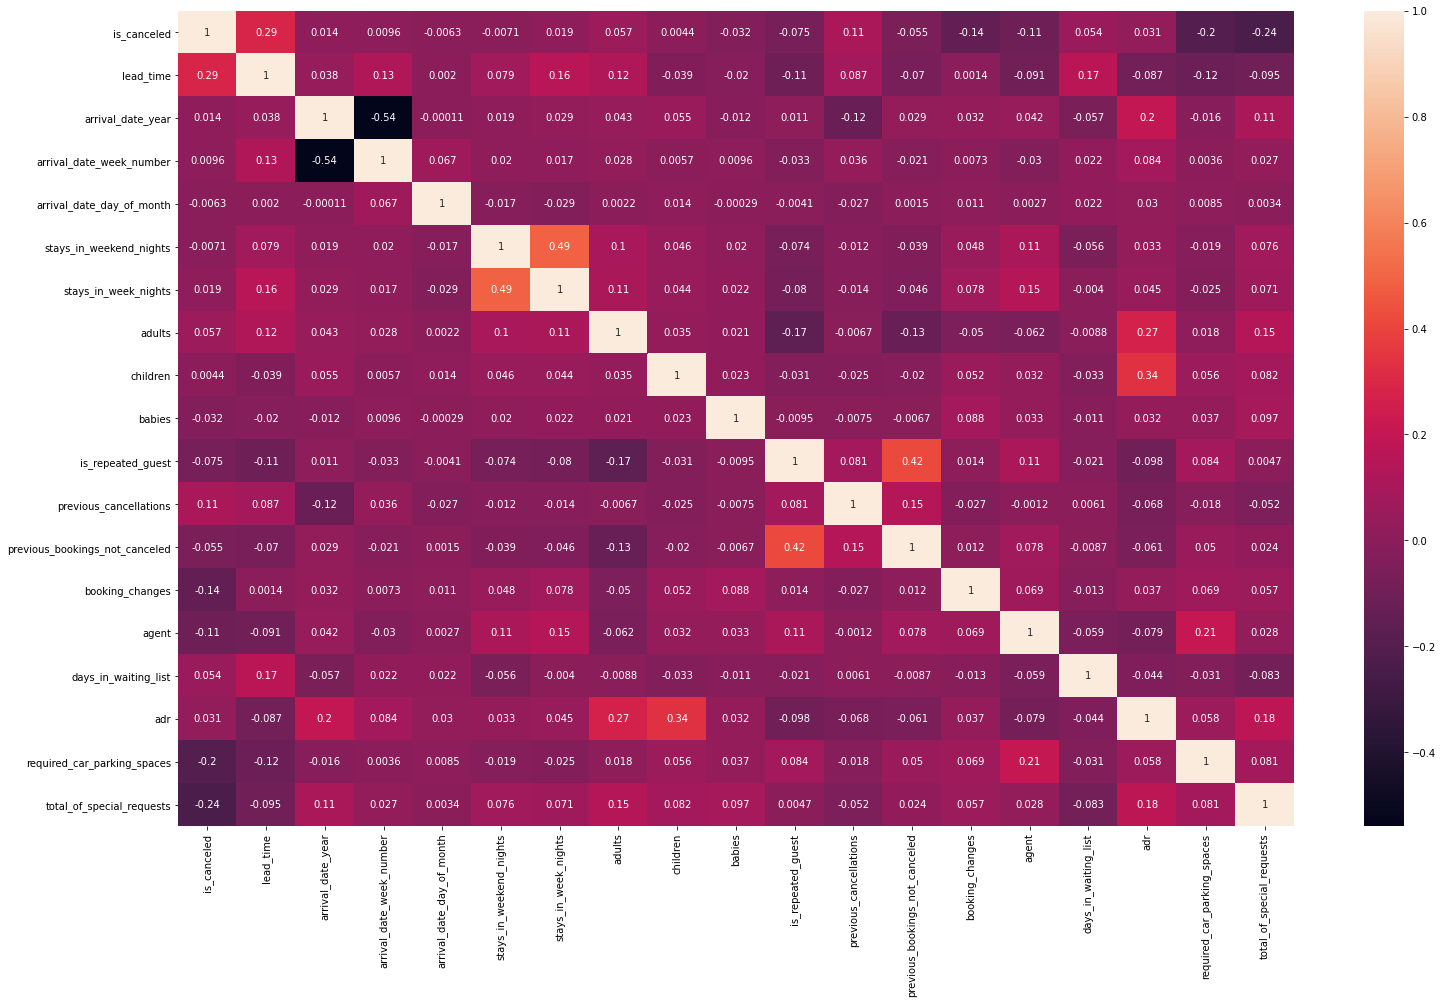

In [16]:
corr = df.corr()                                                                #plotting co-relation chart
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True)
plt.show()                                                                      #there is not much co-relation between any of the feature

#Comparision between city and resort hotel

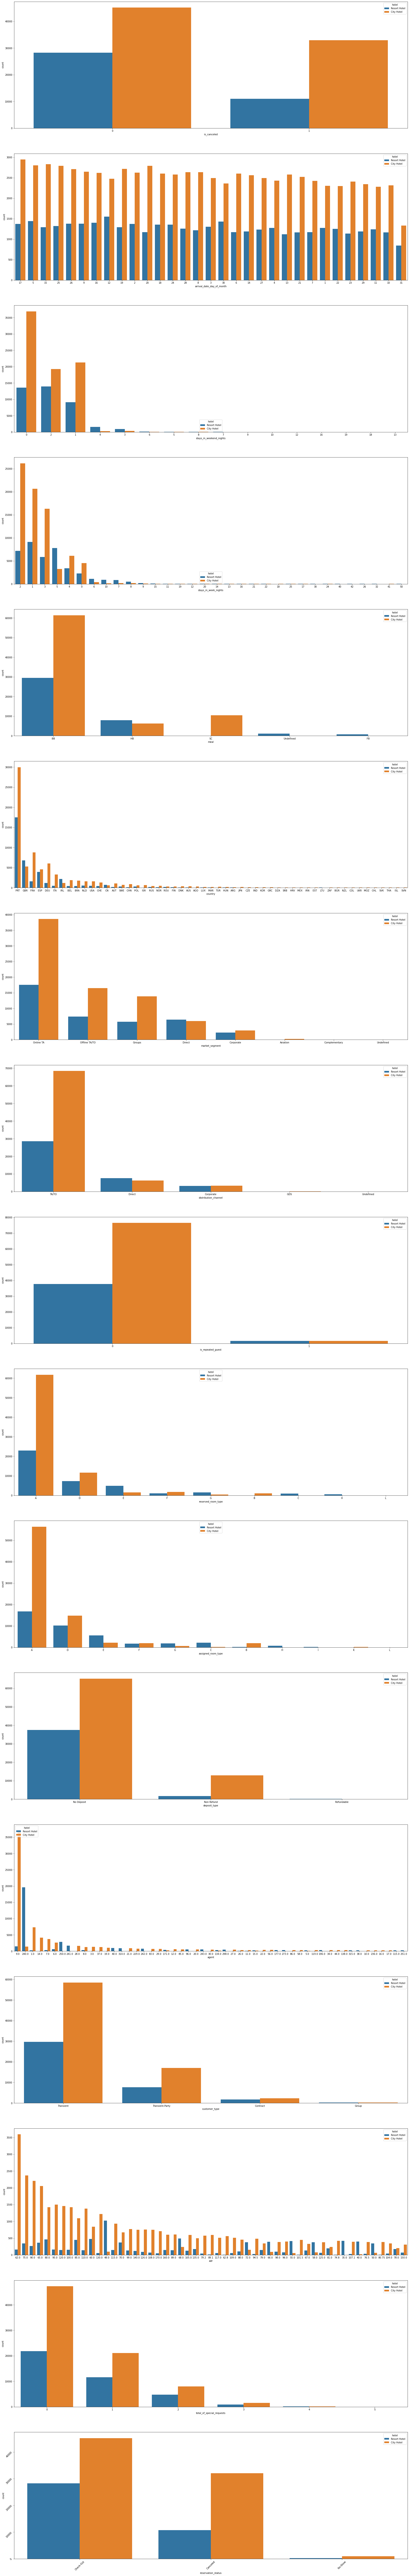

In [17]:
columns = ['is_canceled',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights','meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 
       'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent',
       'customer_type', 'adr',
       'total_of_special_requests',
       'reservation_status', ]     
df_city_hotel=df[df.hotel=='City Hotel']                                        # head on comparision between city and resort hotel
df_Resort_hotel= df[df.hotel=='Resort Hotel']
fig, axs = plt.subplots(len(columns),figsize=(30,200))
count=0
for i in columns:
    sns.countplot(df[i],ax=axs[count],order=df[i].value_counts().iloc[:53].index,hue=df.hotel)

    plt.tick_params(labelrotation=45)
    count+=1
       

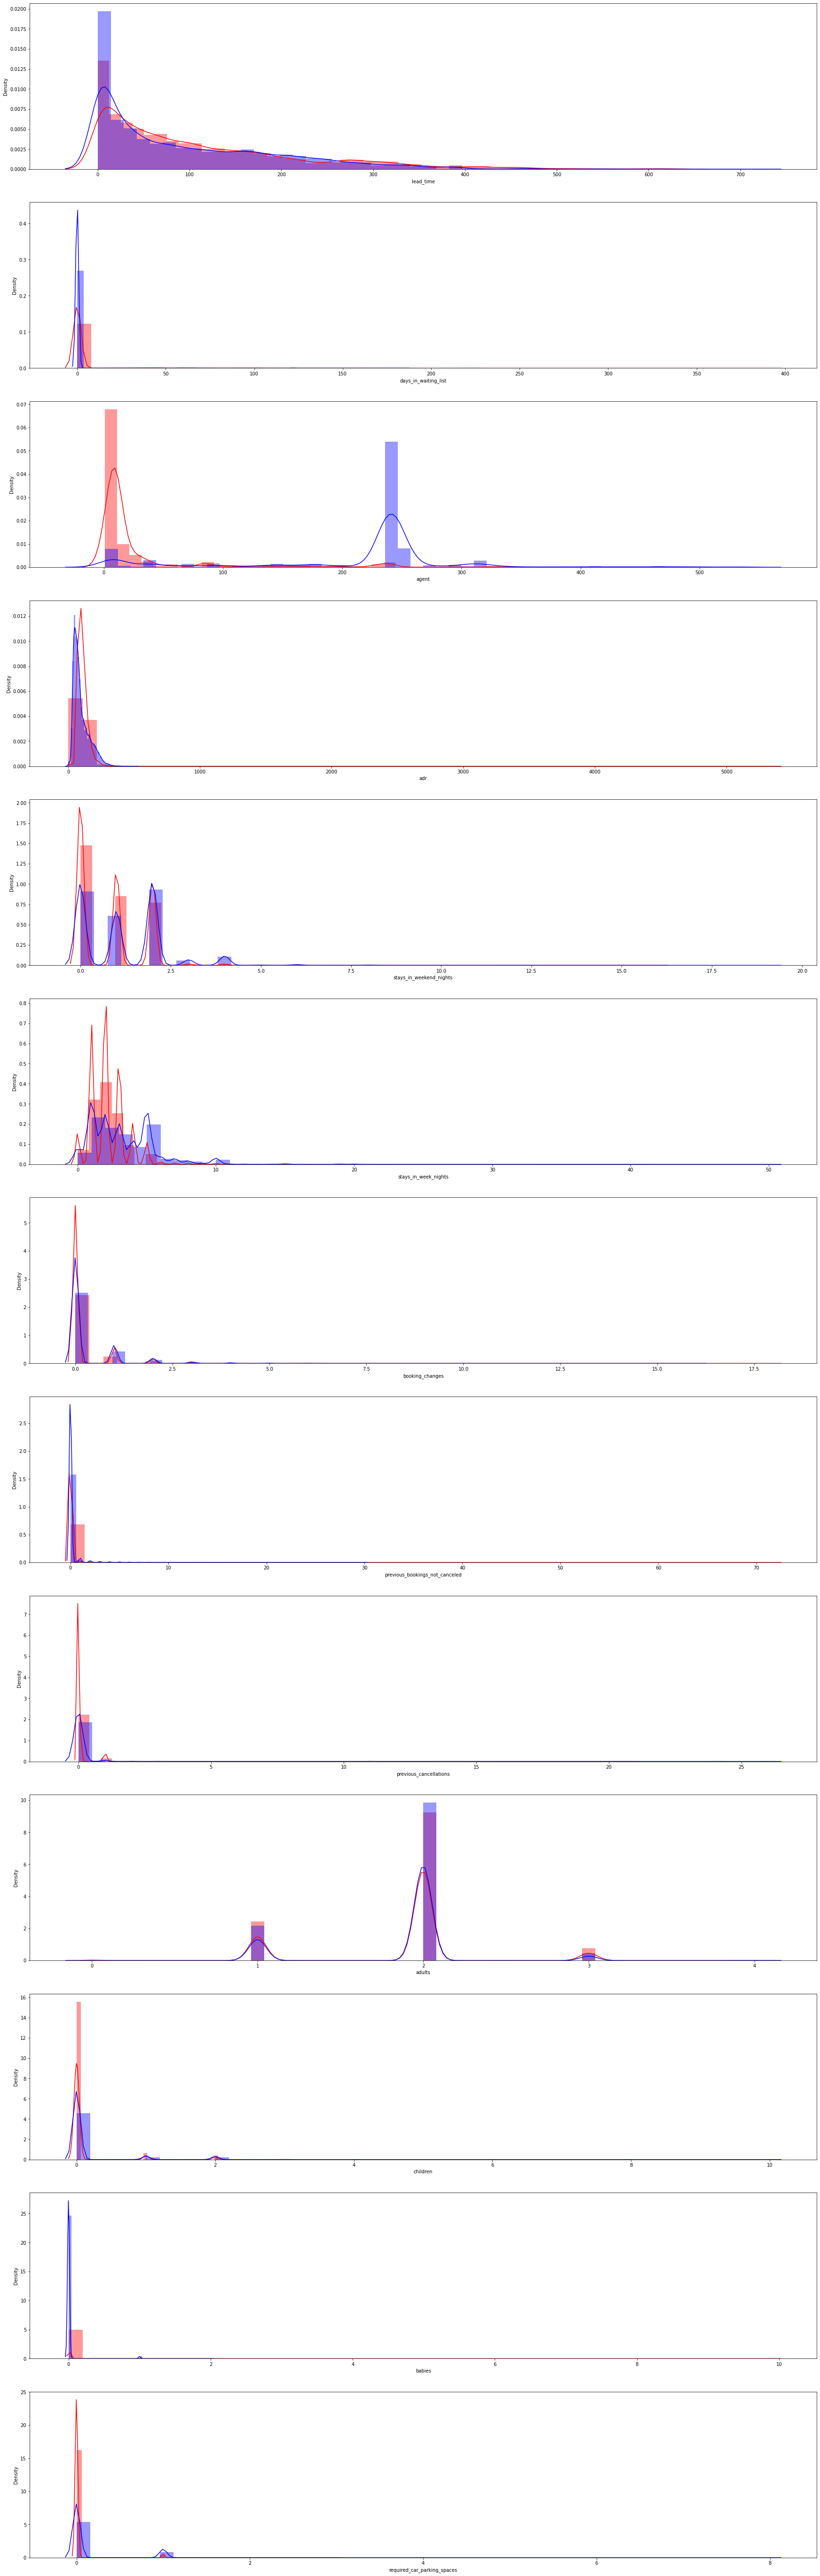

In [18]:
dist=['lead_time','days_in_waiting_list','agent','adr','stays_in_weekend_nights','stays_in_week_nights','booking_changes','previous_bookings_not_canceled','previous_cancellations','adults','children','babies','required_car_parking_spaces']
fig, axs = plt.subplots(len(dist),1,figsize=(30,100))
count=0
for i in dist:
    sns.distplot(df_city_hotel[i],ax=axs[count],color='red')
    sns.distplot(df_Resort_hotel[i],ax=axs[count],color='blue')
    count+=1

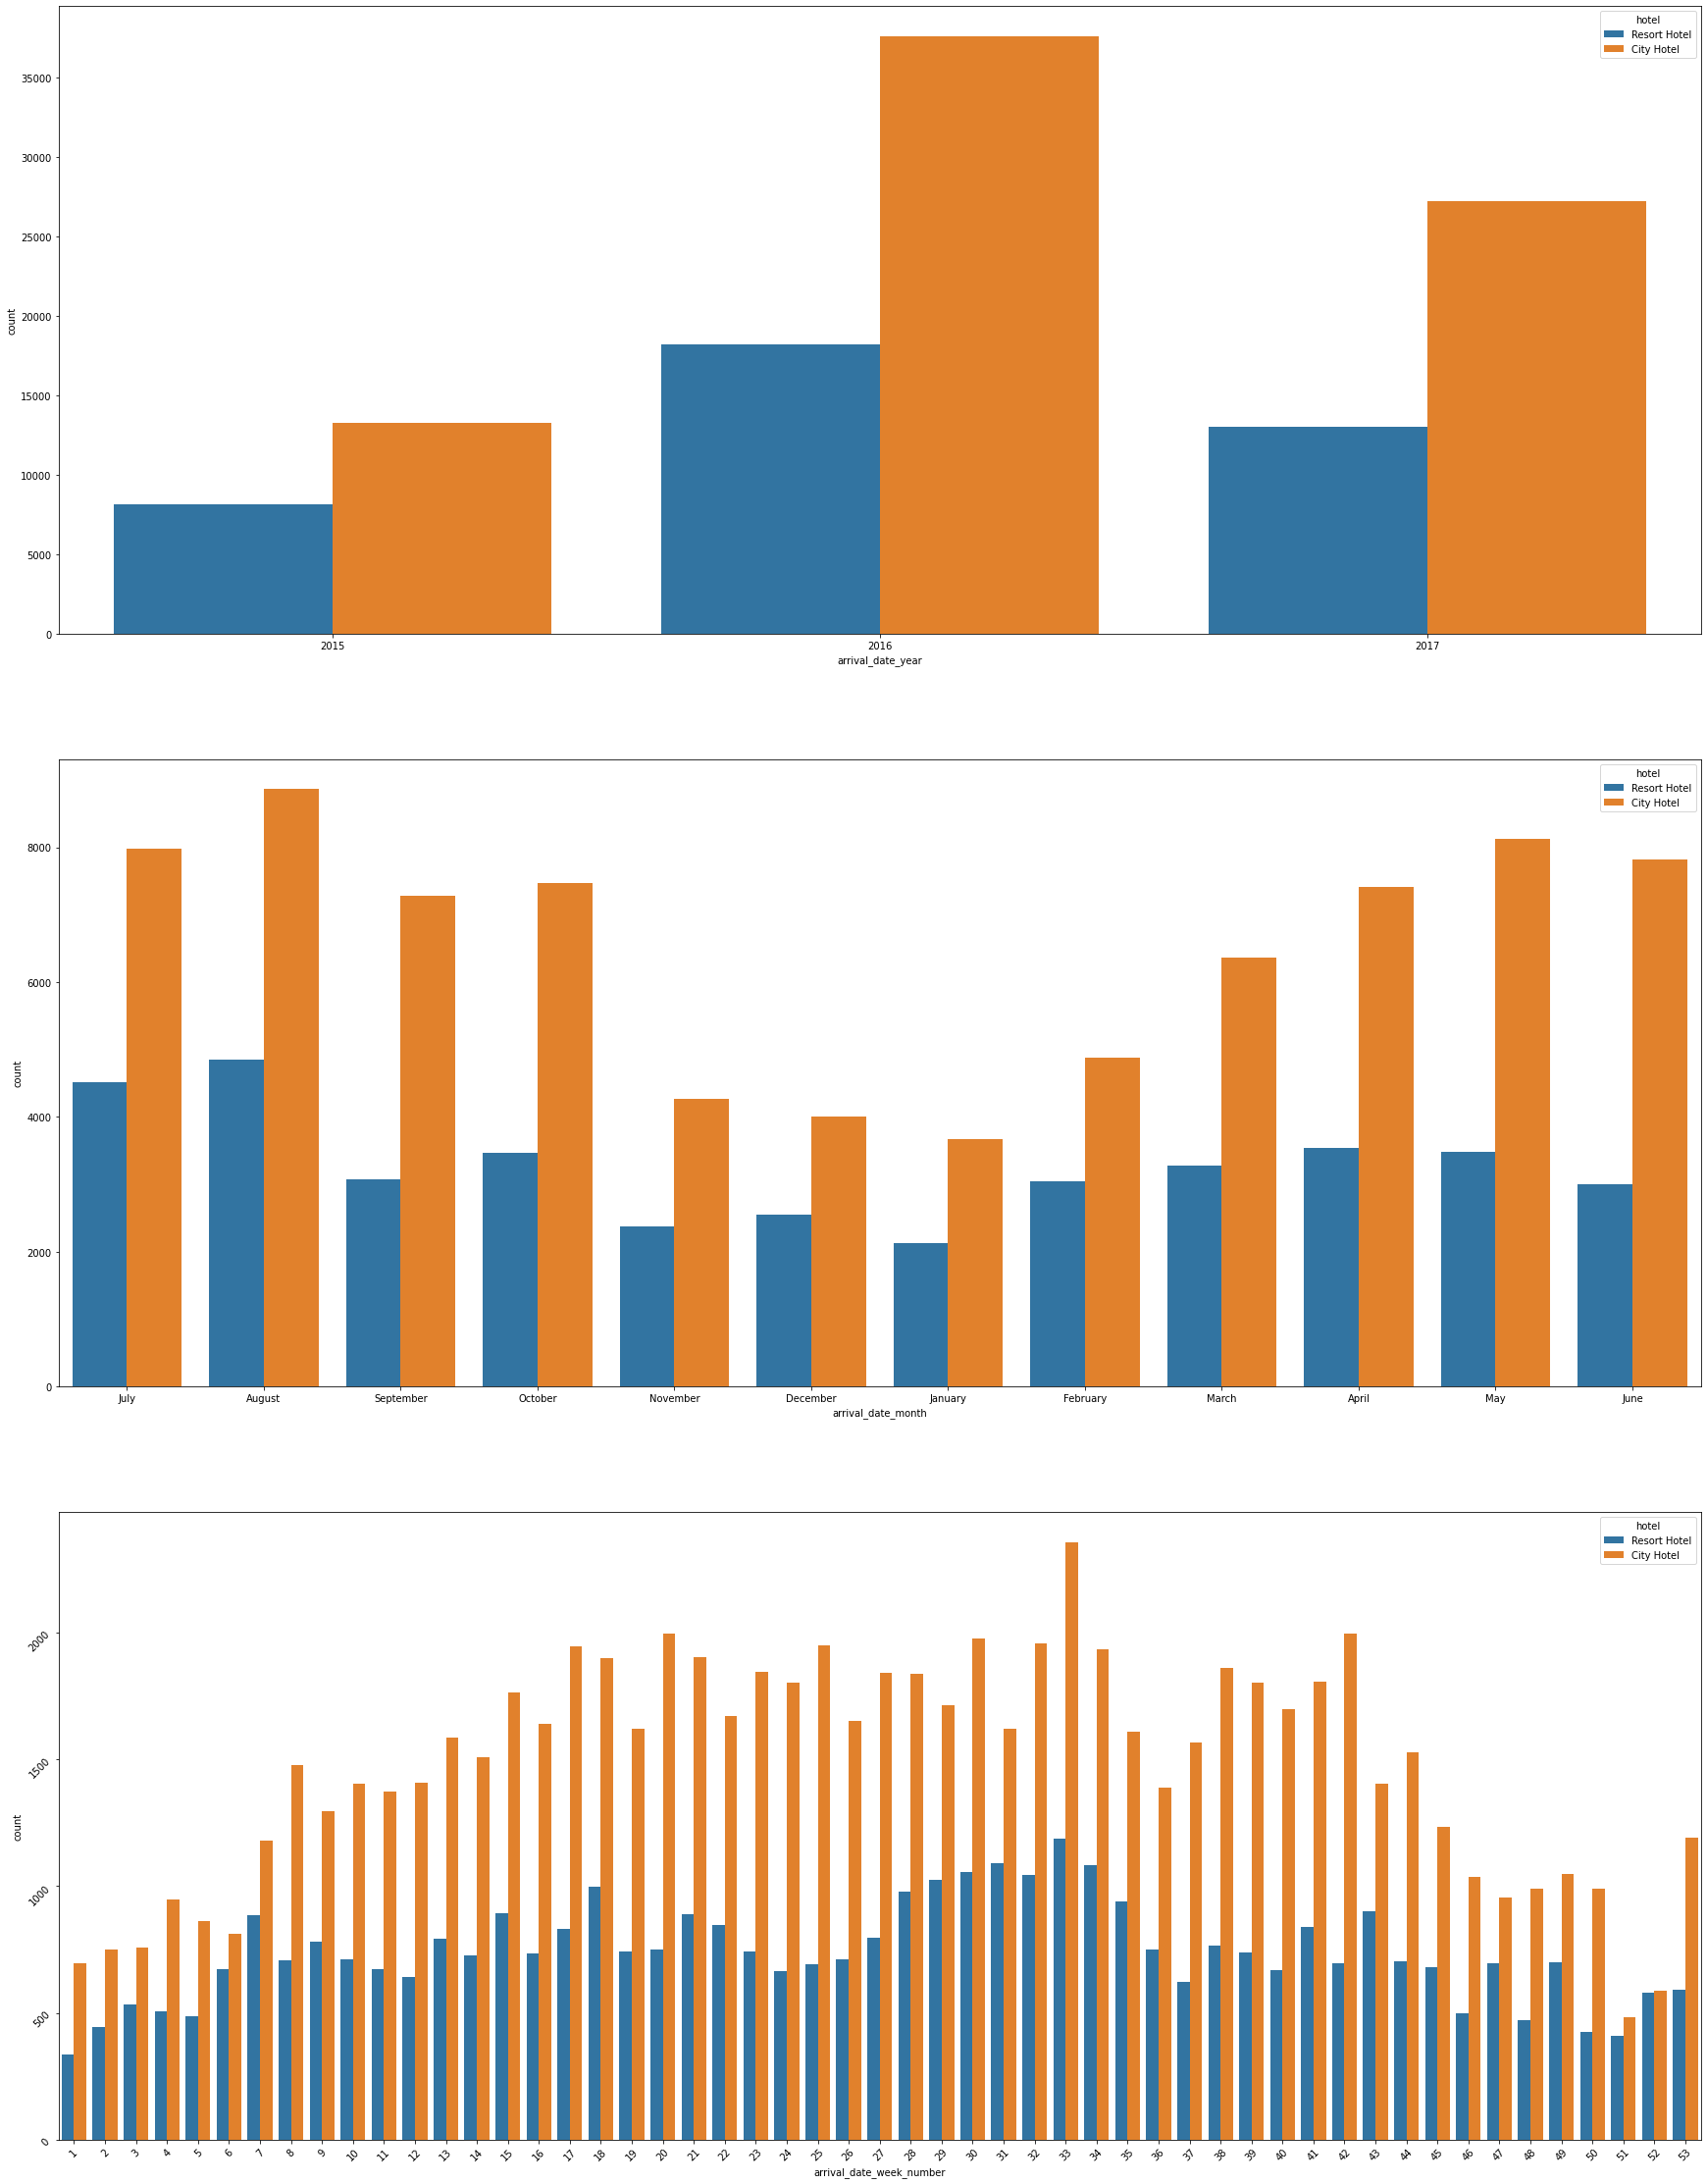

In [19]:
columns2=['arrival_date_year','arrival_date_month', 'arrival_date_week_number']
fig, axs = plt.subplots(len(columns2),figsize=(30,40))
count=0
for i in columns2:
    sns.countplot(df[i],ax=axs[count], hue=df.hotel)
    plt.tick_params(labelrotation=45)
    count+=1


#Timing Analysis

In [20]:
df=df[df.adr <600]                                                                 #there is only one value above 500 adr thus removing it as it is anomaly

In [21]:
#converting date column into datetime format
try:
  df['temp_date_month']=df['arrival_date_month'].apply(lambda x : datetime.strptime(x,'%B'))
except :
  pass
df['Month']=df['temp_date_month'].apply(lambda x: int(str(x)[5:7]))
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,temp_date_month,Month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,240.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1900-07-01,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1900-07-01,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1900-07-01,7
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1900-07-01,7
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,240.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,1900-07-01,7


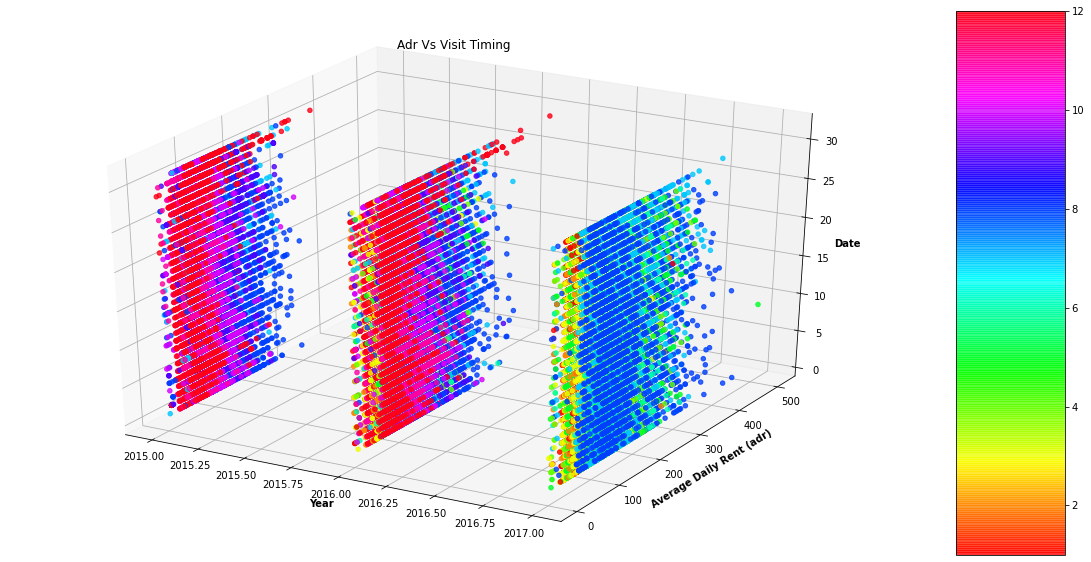

In [22]:
fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection ="3d")
# Creating color map
my_cmap = plt.get_cmap('hsv')
plot=ax.scatter3D(df['arrival_date_year'],df['adr'],df["arrival_date_day_of_month"],cmap = my_cmap,alpha = 0.8,c =(df.Month))
plt.title("Adr Vs Visit Timing")
ax.set_xlabel('Year', fontweight ='bold')
ax.set_ylabel('Average Daily Rent (adr)', fontweight ='bold')
ax.set_zlabel('Date', fontweight ='bold')
fig.colorbar(plot, ax = ax, aspect = 5)
plt.show()                                                                      

average Daily rent depend majorly on Date, but certainly Months plays a Major role as we can see that rent is less for the month of Dec and Jan Possibly due to off season, while july and august have the highest adr, also rent of all the hotels are increasing rapidly this can be concluded by seeing the width of the adr plane

In [23]:
df1=df[(df.stays_in_weekend_nights+df.stays_in_week_nights) <6]                 #again removing the anomaly to get a clear trend                                                                                          

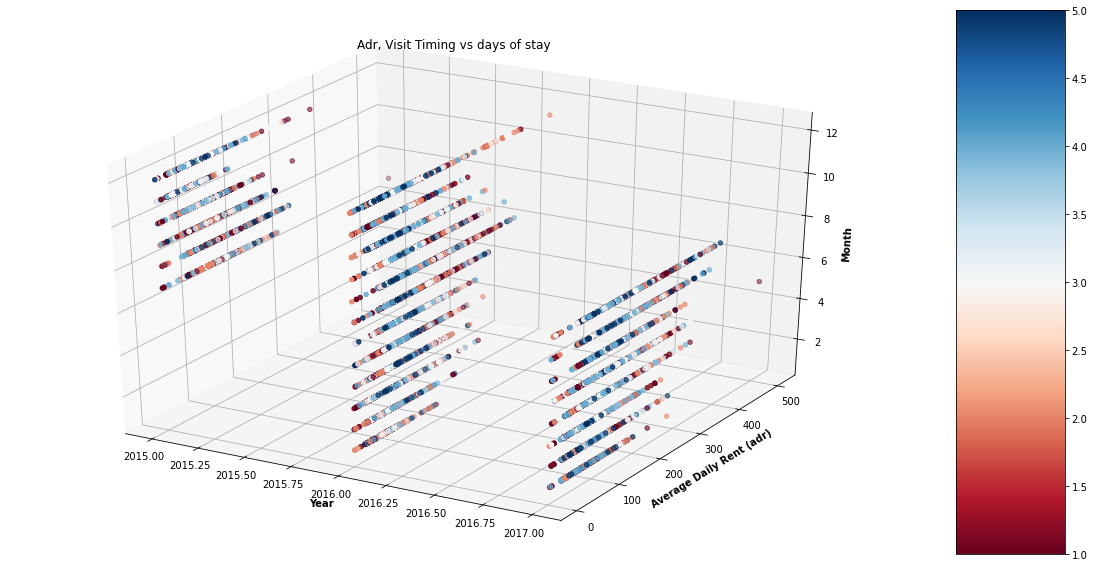

In [24]:
fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection ="3d")
# Creating color map
my_cmap = plt.get_cmap('RdBu')
plot=ax.scatter3D(df1['arrival_date_year'],df1['adr'],df1["Month"],cmap = my_cmap,c =(df1.stays_in_weekend_nights+df1.stays_in_week_nights)) #adding weekend and weekdays to get total length of stay
plt.title("Adr, Visit Timing vs days of stay")
ax.set_xlabel('Year', fontweight ='bold')
ax.set_ylabel('Average Daily Rent (adr)', fontweight ='bold')
ax.set_zlabel('Month', fontweight ='bold')
fig.colorbar(plot, ax = ax, aspect = 5)
plt.show()        

mid values hotel have longer staying customers, also people stay longer in the months of july and August, so to get the best daily rate one should book the hotel for atleast 5 days 

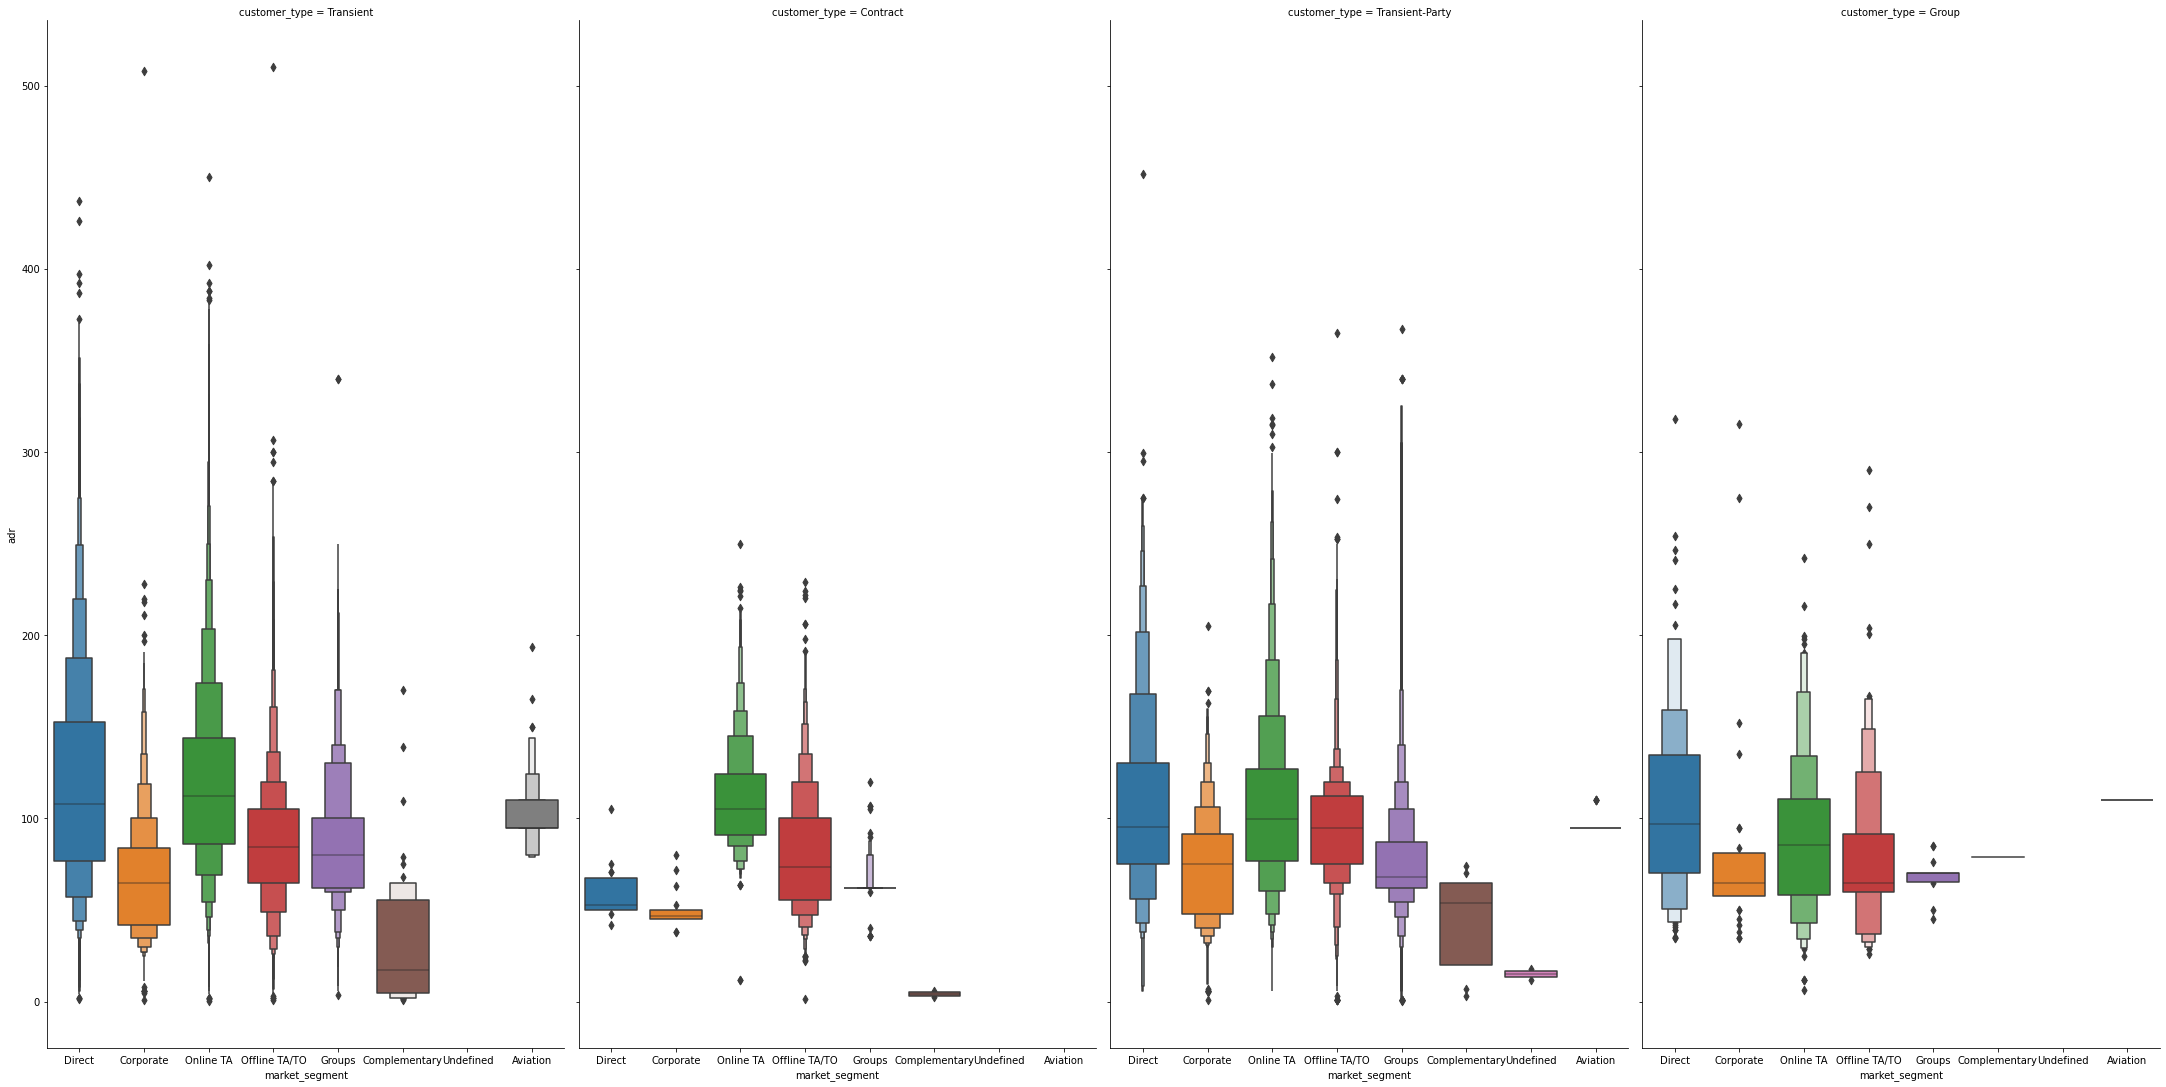

In [25]:
sns.catplot(data=df,y='adr',x='market_segment',height=15, aspect=0.5,kind="boxen",col='customer_type')              # Lets see which Market segment individual live in high tarrif rooms
plt.show()

* For Transient, Transient-Party and Group customers Online TA/To and direct market Segments Stay at hotels with high Adr followed by Aviation, offine TA/To and then Corporate
* where else in contract type Online and offline Ta Dominated 

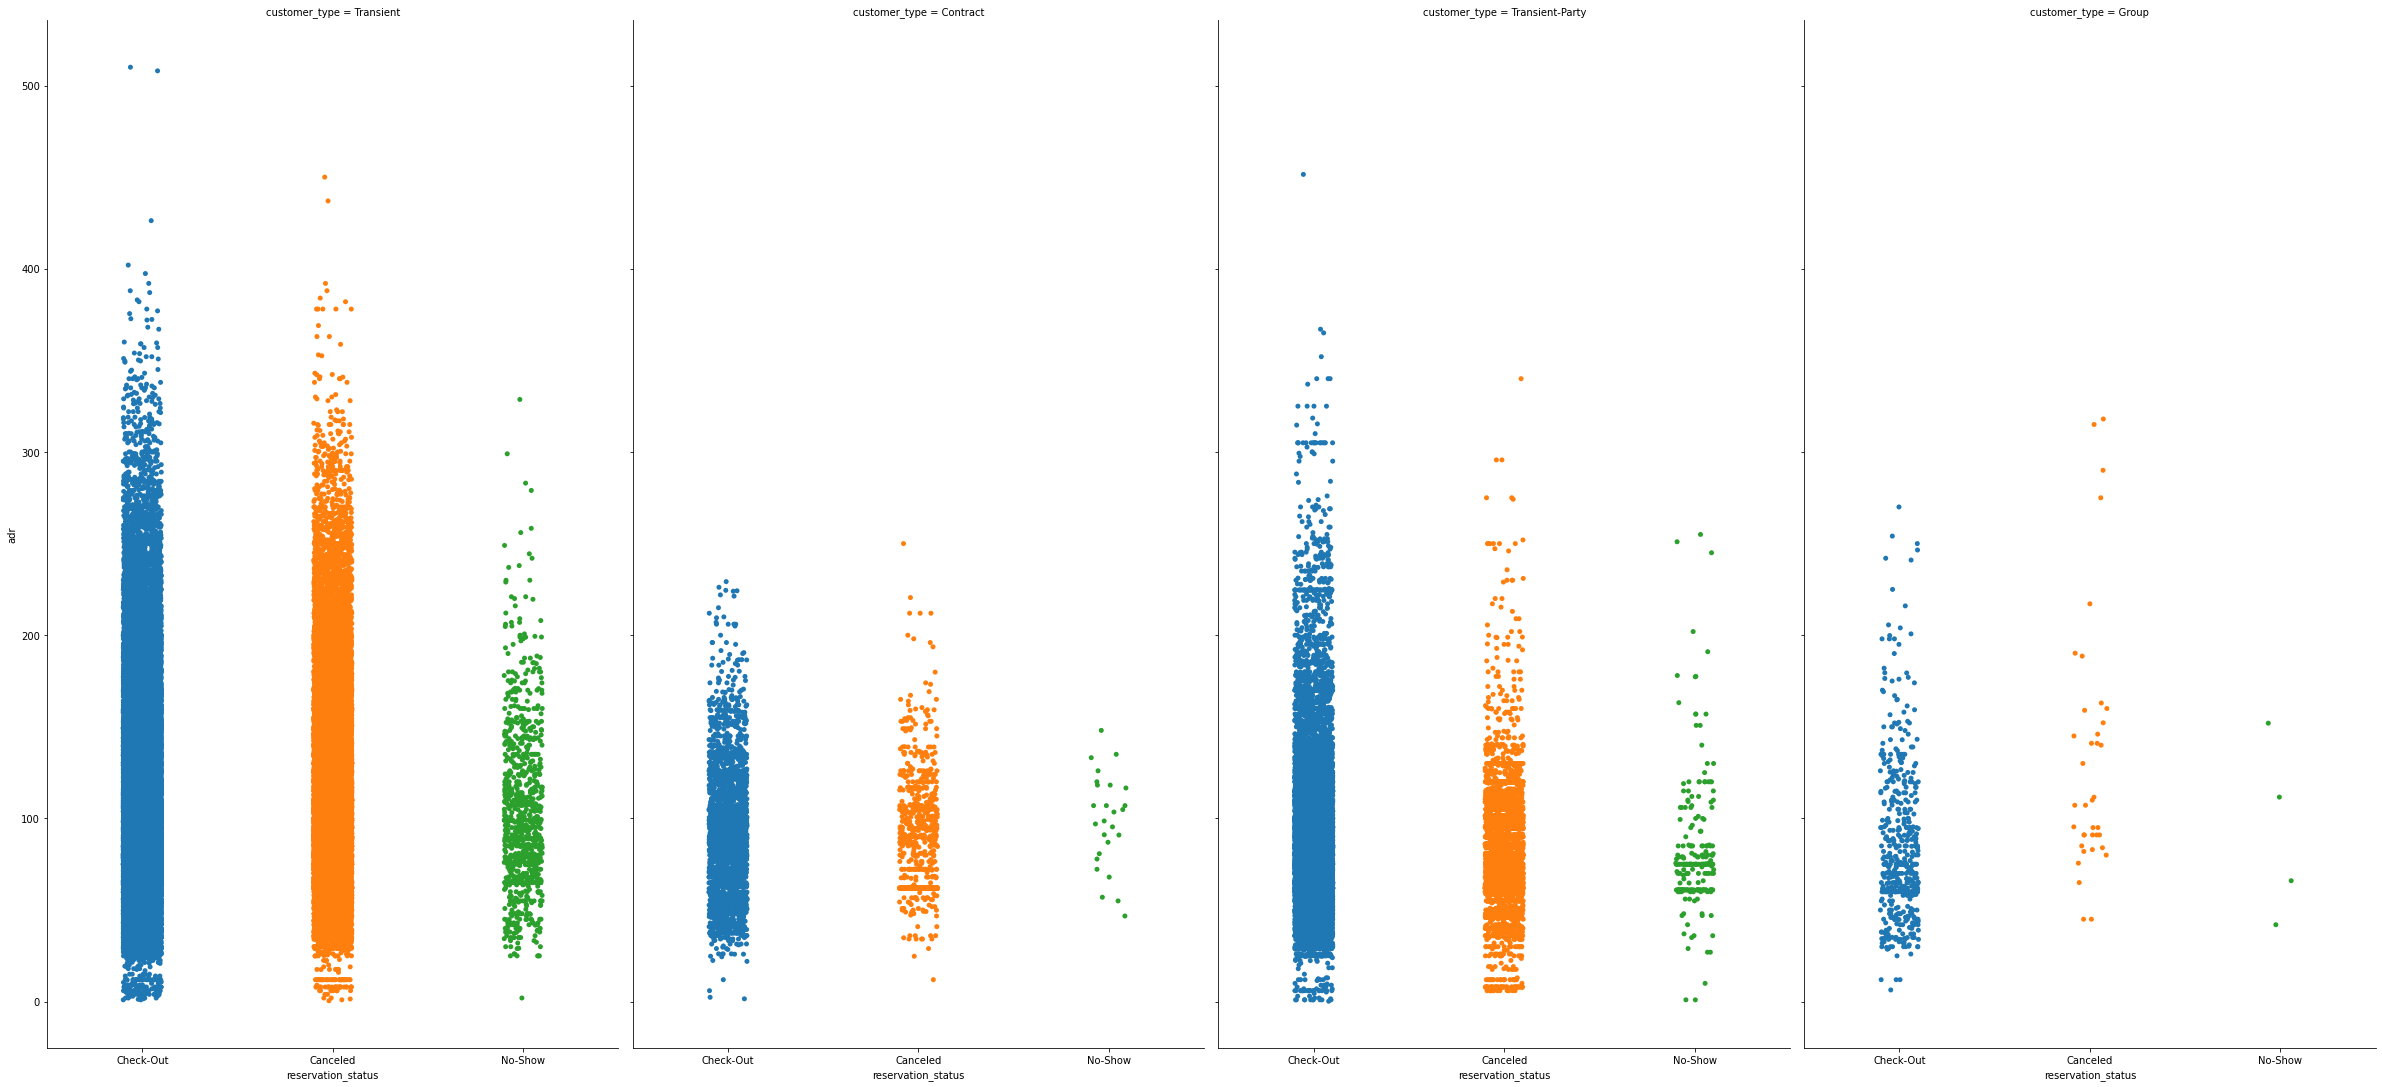

In [26]:
sns.catplot(data=df,y='adr',x='reservation_status',height=15, aspect=0.55,col='customer_type') 

Transient Customers cancels thier booking most of the times, also they are the ones who does not show even after making bookings, where else groups are the most consistent in regards to their plans, also Transient customers books the most expensive rooms out of all segments

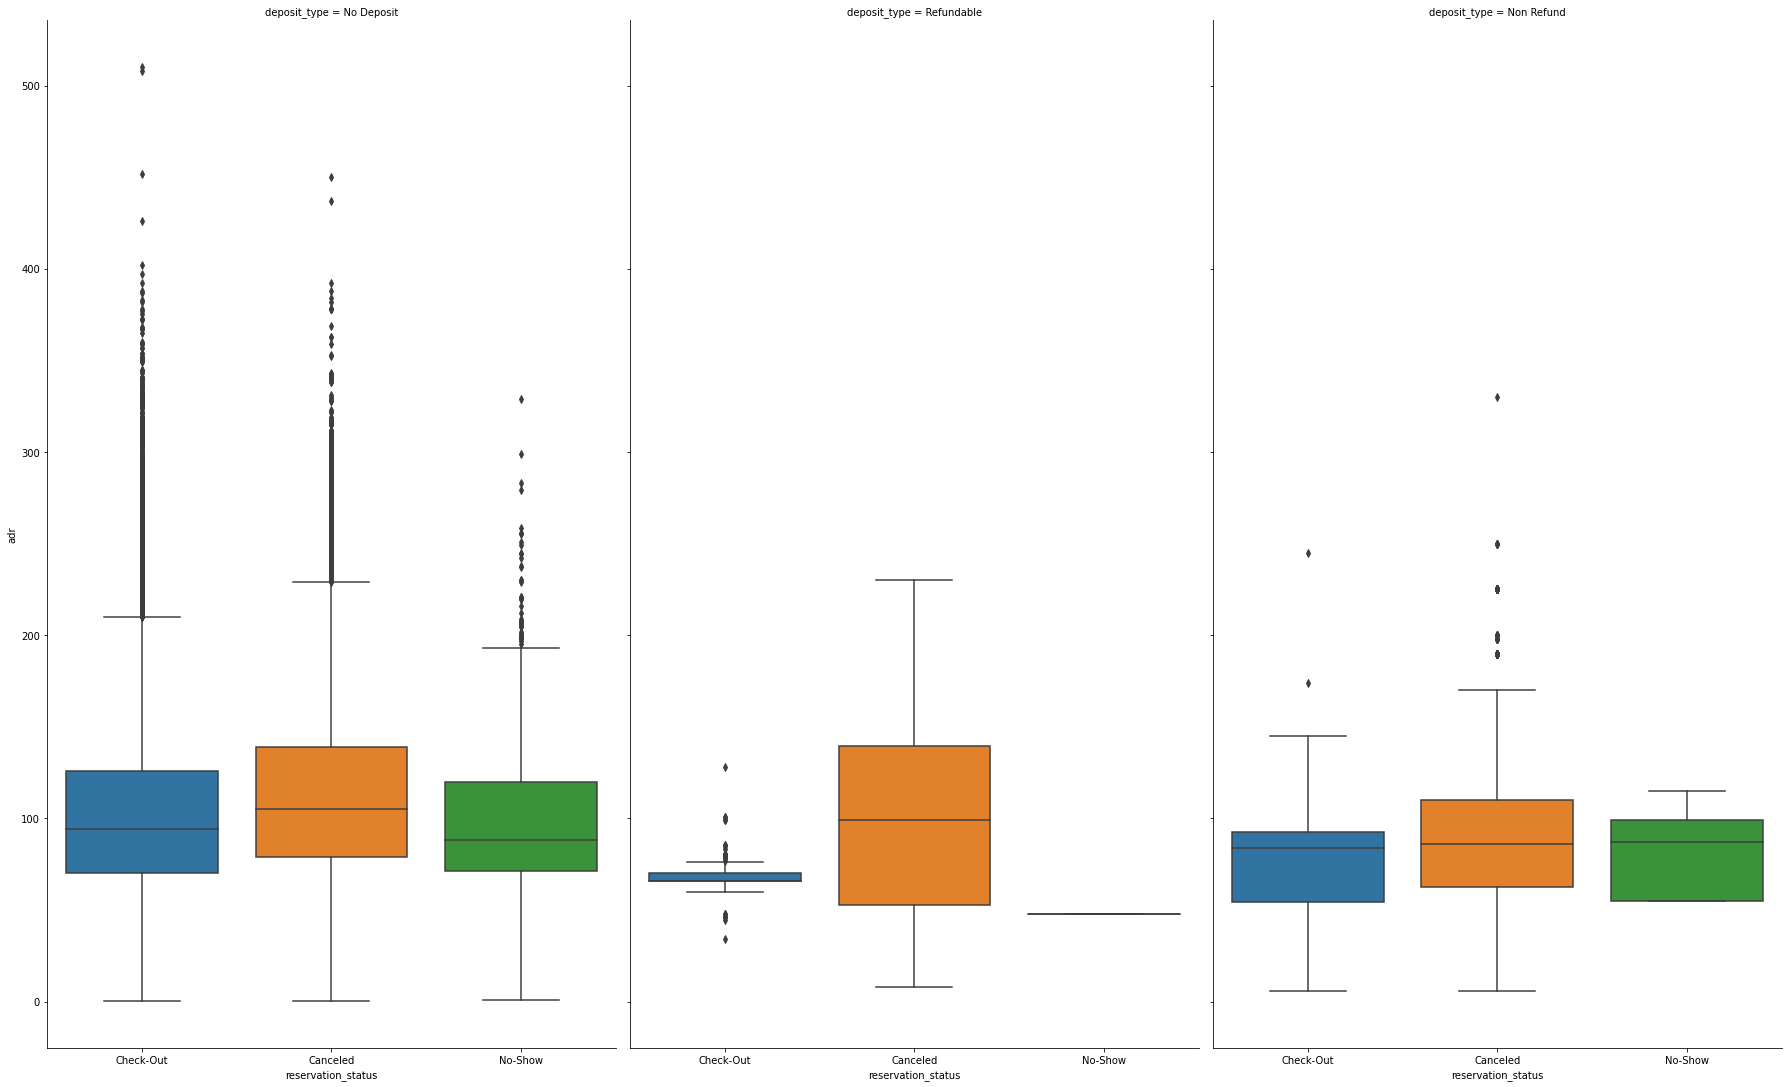

In [27]:
sns.catplot(data=df,y='adr',x='reservation_status',height=15, aspect=0.55,col='deposit_type',kind='box')           #Lets see Deposite type and customer's consistency

This plot actually tells a lot about customer behaviour, the customers who make non refundable booking are the least,so is their no show ratio, wherelse most people make no deposits while bookings and thus are most inconsistent as well

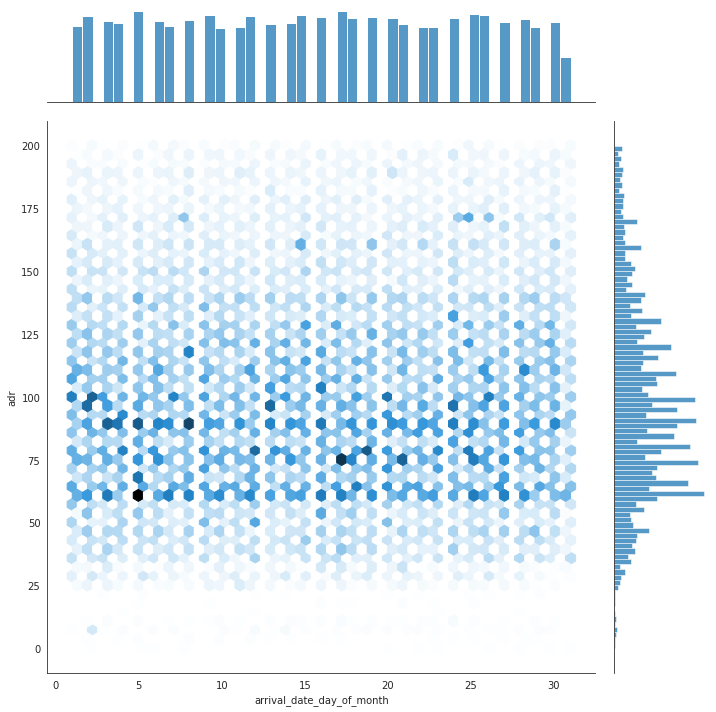

In [28]:
with sns.axes_style('white'):
    sns.jointplot('arrival_date_day_of_month', "adr", df[df.adr<200], kind='hex',height=10)         #price along the month is almost the same.

Lets take a look at Averages :

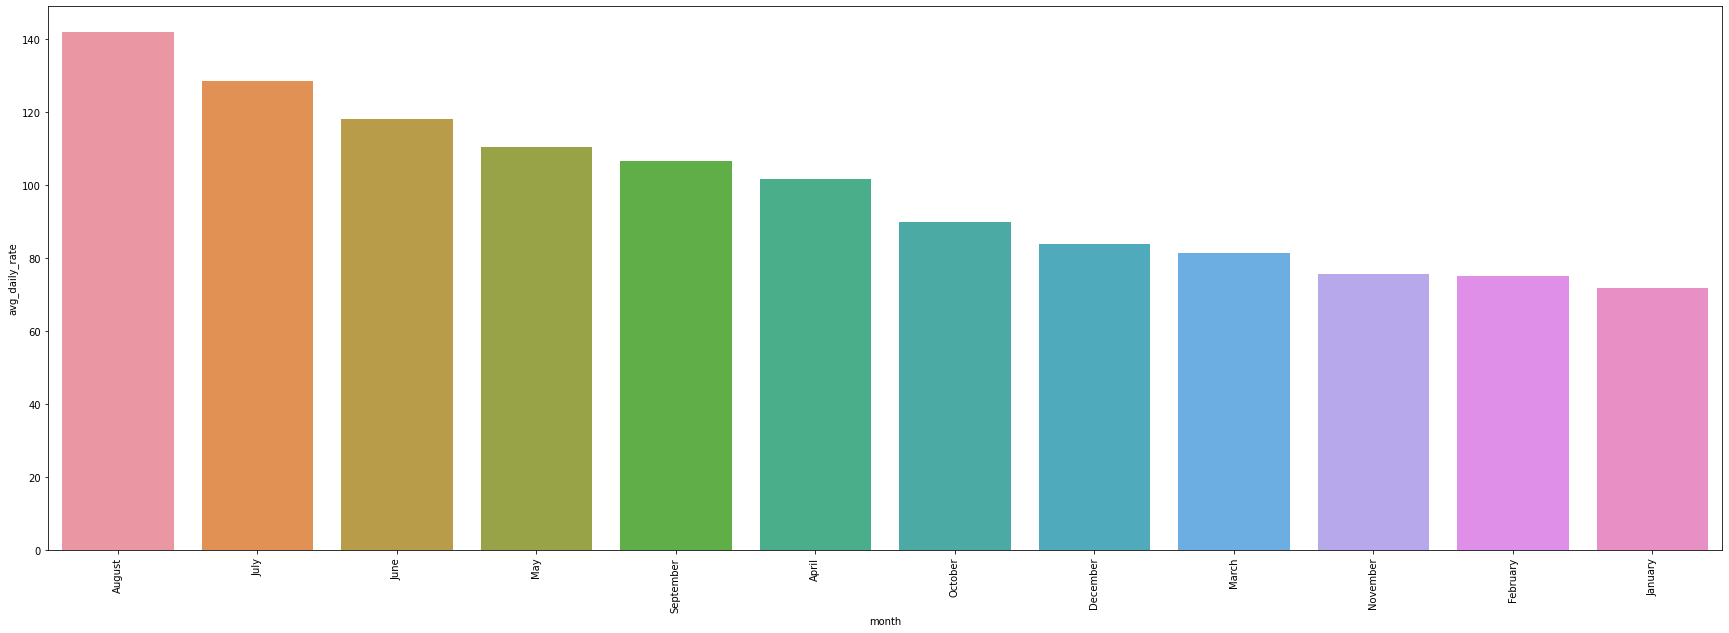

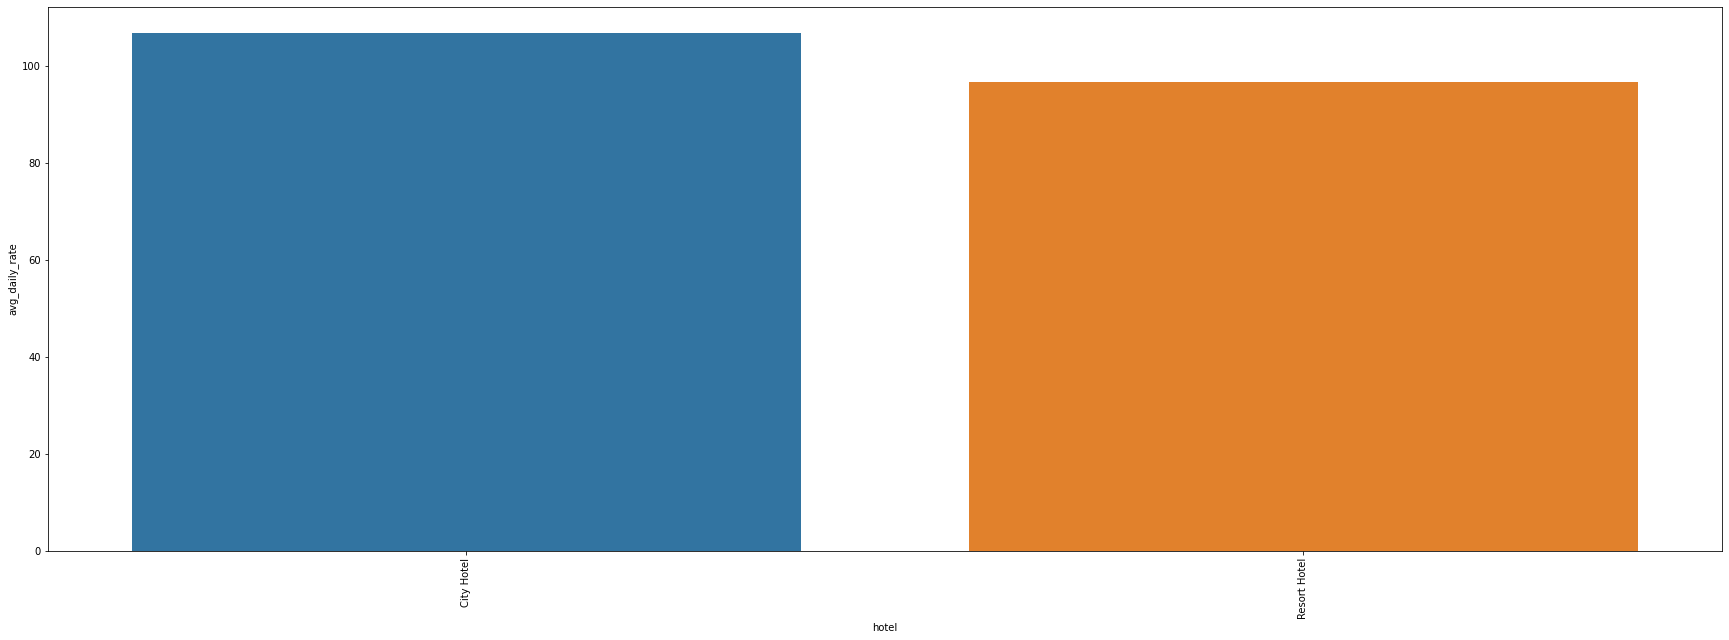

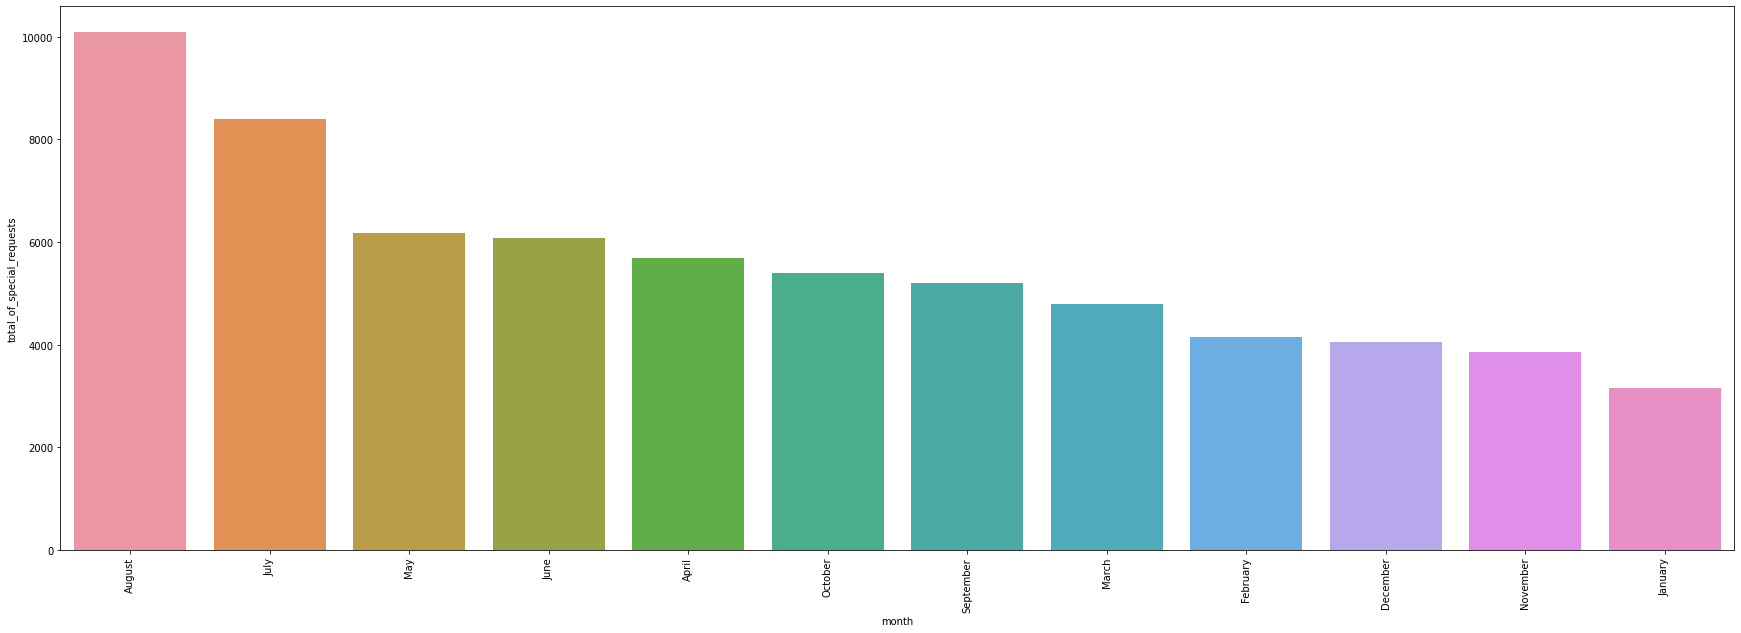

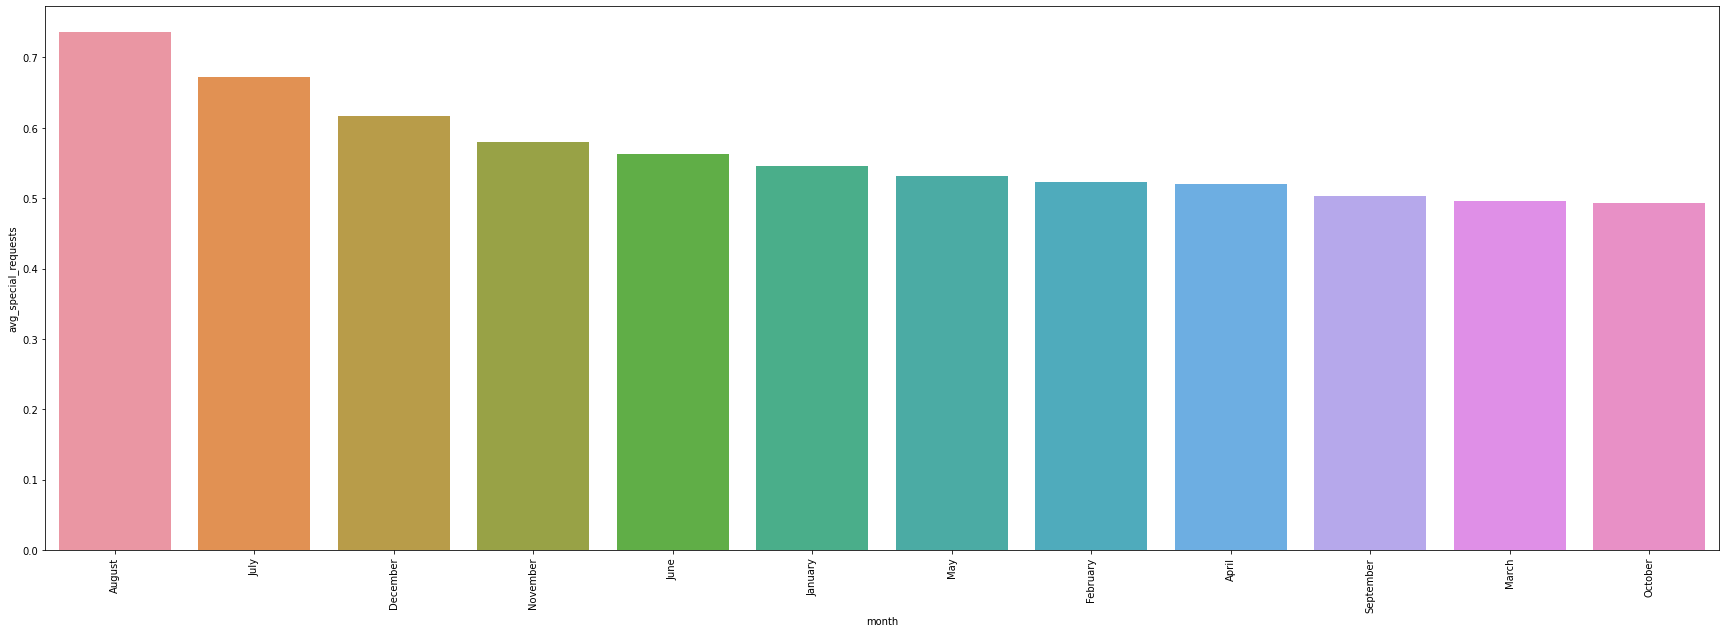

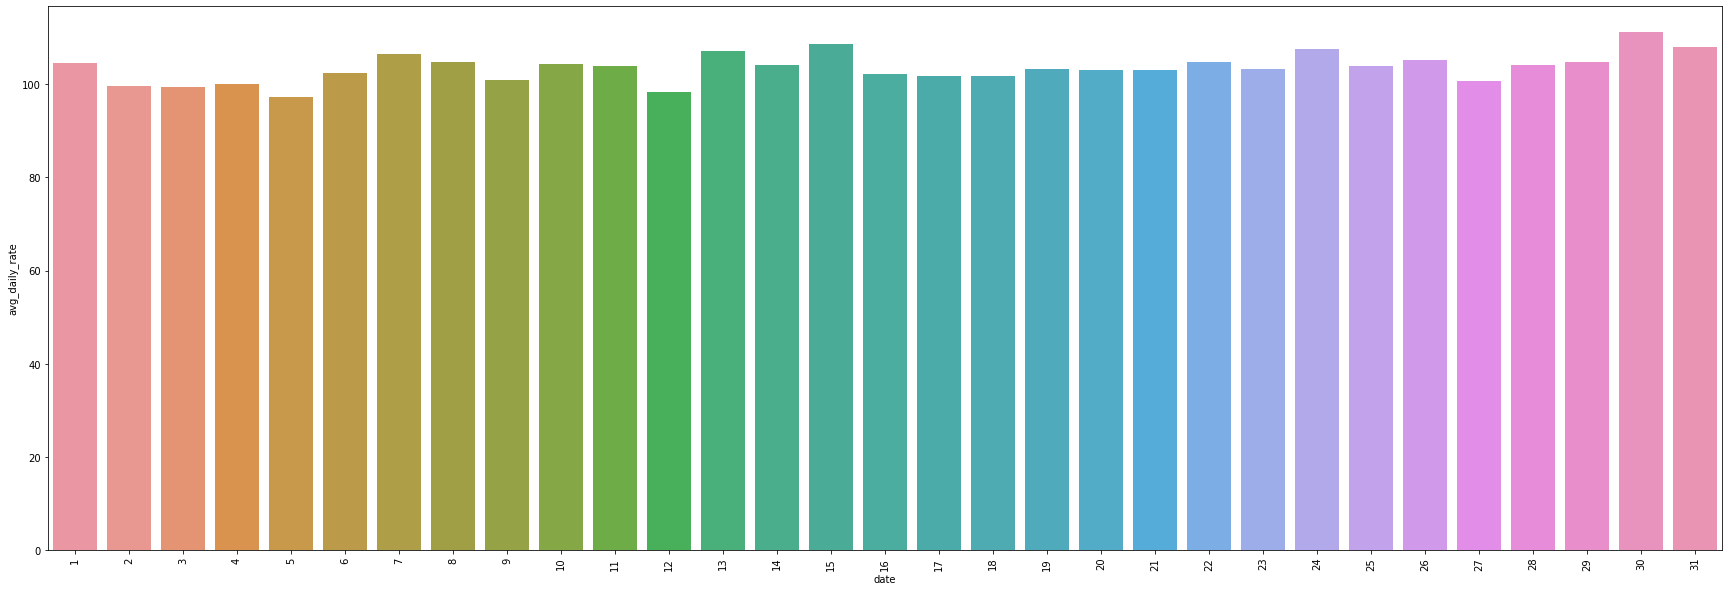

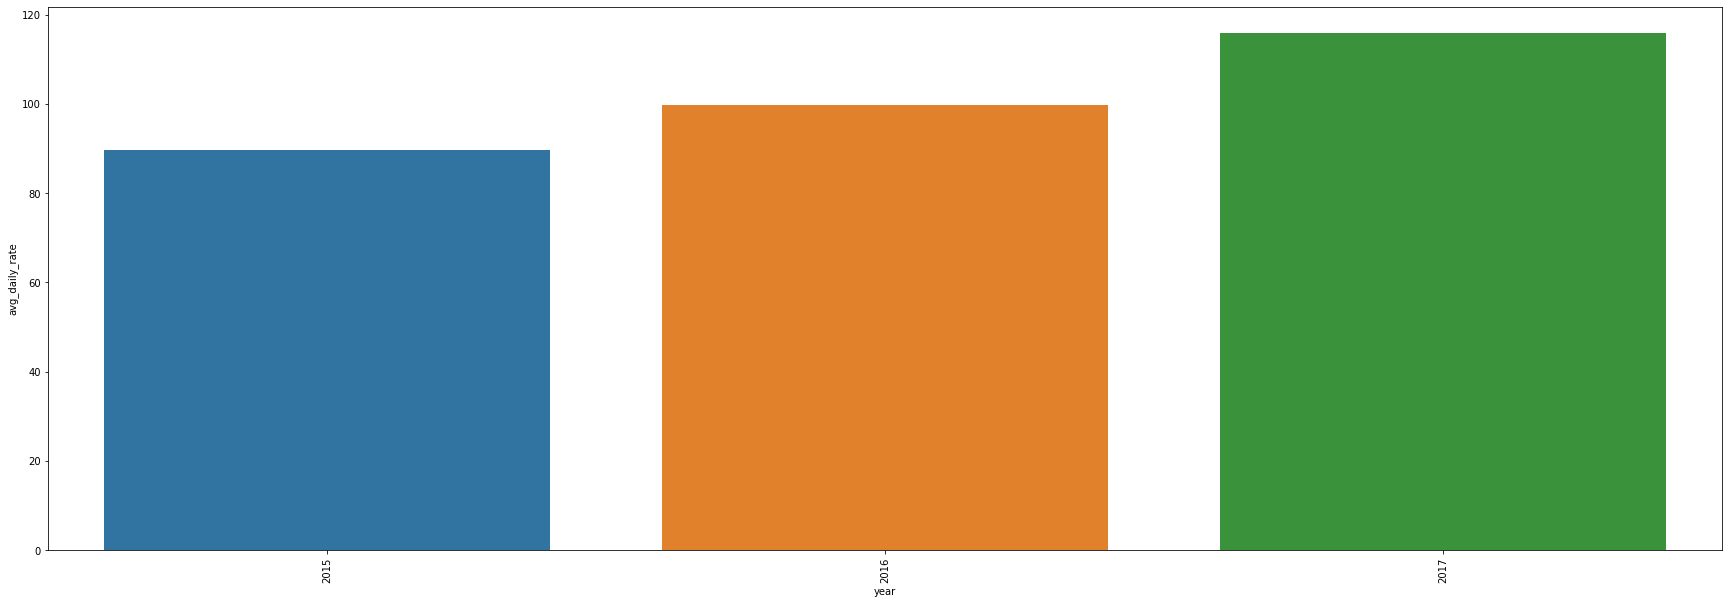

In [29]:
avg_daily_rate_vs_month=(df.groupby(by='arrival_date_month')['adr'].sum()/df.groupby(by='arrival_date_month')['adr'].count()).sort_values(ascending=False)
avg_daily_rate_vs_date=df.groupby(by='arrival_date_day_of_month')['adr'].sum()/(df.groupby(by='arrival_date_day_of_month')['adr'].count())
avg_daily_rate_vs_year=df.groupby(by='arrival_date_year')['adr'].sum()/(df.groupby(by='arrival_date_year')['adr'].count())
total_of_special_requests_vs_month=df.groupby(by='arrival_date_month')['total_of_special_requests'].sum().sort_values(ascending=False)
avg_special_requests_vs_month=(df.groupby(by='arrival_date_month')['total_of_special_requests'].sum()/df.groupby(by='arrival_date_month')['total_of_special_requests'].count()).sort_values(ascending=False)
avg_daily_rate_vs_hotel=df.groupby(by='hotel')['adr'].sum()/df.groupby(by='hotel')['adr'].count()
plots=[avg_daily_rate_vs_month,avg_daily_rate_vs_hotel,total_of_special_requests_vs_month,avg_special_requests_vs_month,avg_daily_rate_vs_date,avg_daily_rate_vs_year]
plot2=['avg_daily_rate_vs_month','avg_daily_rate_vs_hotel','total_of_special_requests_vs_month','avg_special_requests_vs_month','avg_daily_rate_vs_date','avg_daily_rate_vs_year']


count=0
for i in plots:
  plt.figure(figsize=(30,10))
  sns.barplot(i.index.astype(str),i.values)
  plt.xlabel(plot2[count].split('_vs_')[1])
  plt.ylabel(plot2[count].split('_vs_')[0])
  plt.xticks(rotation=90)
  plt.show()
  count+=1

Let's customize the Data for our Indian Public who want to get hotel room booked in this area, and tell them which agent they should contact.


*   Our priority is to get hotel which assign the room which we have reserved while booking
*   Hotel should have hosted some Indian guest previously as well
*   Avg_daily_price should be less than 100 Pound
* No intial Deposit is to be made




In [30]:
df_indian_preference=df[(df['reserved_room_type']==df.assigned_room_type) & (df['country']=='IND') & (df['adr']<=100)  ]

In [31]:
def count_table(df):  
  column_list=['arrival_date_month','agent','hotel','country', 'is_canceled', 'lead_time', 'arrival_date_year',
          'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
          'market_segment', 'distribution_channel',
        'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'reserved_room_type',
        'assigned_room_type', 'booking_changes', 'deposit_type', 
        'days_in_waiting_list', 'customer_type', 'adr',
        'required_car_parking_spaces', 'total_of_special_requests',
        'reservation_status', 'reservation_status_date']
  count_dataset=pd.DataFrame()
  distinct_features=[]                                                                                          #Empty list to know the number of distict features,sum of all these values, and sum of values top 10 comprises
  for i in column_list:                                                                                               
    count_dataset[i]= pd.Series(df[i].value_counts().sort_values(ascending=False).head(10).index)      
    count_dataset[f'{i}_count']=pd.Series(df[i].value_counts().sort_values(ascending=False).head(10).values).astype('int')   
    distinct_features.append((len(df[i].value_counts().index),df[i].value_counts().sum(),df[i].value_counts().sort_values(ascending=False).head(10).sum())) 
  final_tally=list(zip(column_list,distinct_features))                                                           #Zipping with column_list
  count_dataset   
  col_ref={}  
  for i in column_list:
    if i in ['children','country','agent','company']:                                                           #colur red shows the features having some Nan
      col_ref[i]='background-color: red'  
    else:
      col_ref[i]='background-color: blue'                                                                       #colur blue shows the features 
    temp=f'{i}_count'
    col_ref[temp]='background-color: green'                                                                     #colur blue shows the count
  def Nan_as_black(val):
    if str(val)=='nan':
      color = 'black'
      return 'color: %s' % color
  count_dataset=count_dataset.style.apply(lambda x: pd.DataFrame(col_ref, index=count_dataset.index, columns=count_dataset.columns).fillna(''), axis=None).highlight_null('black').applymap(Nan_as_black)
  return count_dataset

In [32]:
count_table(df_indian_preference)

,arrival_date_month,arrival_date_month_count,agent,agent_count,hotel,hotel_count,country,country_count,is_canceled,is_canceled_count,lead_time,lead_time_count,arrival_date_year,arrival_date_year_count,arrival_date_week_number,arrival_date_week_number_count,arrival_date_day_of_month,arrival_date_day_of_month_count,stays_in_weekend_nights,stays_in_weekend_nights_count,stays_in_week_nights,stays_in_week_nights_count,adults,adults_count,children,children_count,babies,babies_count,meal,meal_count,market_segment,market_segment_count,distribution_channel,distribution_channel_count,is_repeated_guest,is_repeated_guest_count,previous_cancellations,previous_cancellations_count,previous_bookings_not_canceled,previous_bookings_not_canceled_count,reserved_room_type,reserved_room_type_count,assigned_room_type,assigned_room_type_count,booking_changes,booking_changes_count,deposit_type,deposit_type_count,days_in_waiting_list,days_in_waiting_list_count,customer_type,customer_type_count,adr,adr_count,required_car_parking_spaces,required_car_parking_spaces_count,total_of_special_requests,total_of_special_requests_count,reservation_status,reservation_status_count,reservation_status_date,reservation_status_date_count
0,November,17,9.000000,18,City Hotel,44.000000,IND,59.000000,0.000000,52.000000,98,7,2016.000000,32.000000,48,6,3,6,0.000000,28.000000,2.000000,18.000000,2.000000,44.000000,0.000000,54.000000,0.000000,59.000000,BB,48.000000,Online TA,43.000000,TA/TO,54.000000,0.000000,59.000000,0.000000,59.000000,0.000000,59.000000,A,43.000000,A,43.000000,0.000000,46.000000,No Deposit,59.000000,0.000000,59.000000,Transient,47.000000,70.000000,5,0.000000,56.000000,0.000000,27.000000,Check-Out,52.000000,2015-11-26,4
1,April,12,7.000000,9,Resort Hotel,15.000000,nan,nan,1.000000,7.000000,1,3,2017.000000,16.000000,45,6,23,6,2.000000,18.000000,3.000000,17.000000,1.000000,15.000000,1.000000,5.000000,nan,nan,SC,10.000000,Groups,7.000000,Direct,4.000000,nan,nan,nan,nan,nan,nan,D,12.000000,D,12.000000,1.000000,9.000000,nan,nan,nan,nan,Transient-Party,11.000000,93.600000,3,1.000000,3.000000,1.000000,20.000000,Canceled,6.000000,2017-04-18,3
2,March,6,240.000000,7,nan,nan,nan,nan,nan,nan,76,3,2015.000000,11.000000,15,5,15,5,1.000000,13.000000,1.000000,14.000000,nan,nan,nan,nan,nan,nan,HB,1.000000,Direct,4.000000,Corporate,1.000000,nan,nan,nan,nan,nan,nan,E,3.000000,E,3.000000,2.000000,4.000000,nan,nan,nan,nan,Contract,1.000000,94.000000,2,nan,nan,2.000000,8.000000,No-Show,1.000000,2016-11-12,3
3,February,6,37.000000,6,nan,nan,nan,nan,nan,nan,73,3,nan,nan,46,4,21,5,nan,nan,4.000000,4.000000,nan,nan,nan,nan,nan,nan,nan,nan,Offline TA/TO,3.000000,nan,nan,nan,nan,nan,nan,nan,nan,B,1.000000,B,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,73.880000,2,nan,nan,3.000000,4.000000,nan,nan,2016-10-26,3
4,January,5,241.000000,5,nan,nan,nan,nan,nan,nan,31,2,nan,nan,40,4,13,4,nan,nan,0.000000,3.000000,nan,nan,nan,nan,nan,nan,nan,nan,Corporate,2.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,79.200000,2,nan,nan,nan,nan,nan,nan,2016-09-30,2
5,December,3,14.000000,3,nan,nan,nan,nan,nan,nan,34,2,nan,nan,11,4,18,3,nan,nan,6.000000,2.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,85.750000,2,nan,nan,nan,nan,nan,nan,2015-10-03,2
6,October,3,83.000000,3,nan,nan,nan,nan,nan,nan,25,2,nan,nan,18,3,1,3,nan,nan,5.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,75.000000,2,nan,nan,nan,nan,nan,nan,2017-05-02,1
7,September,3,115.000000,1,nan,nan,nan,nan,nan,nan,56,2,nan,nan,3,3,16,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,64.170000,2,nan,nan,nan,nan,nan,nan,2017-03-20,1
8,May,2,250.000000,1,nan,nan,nan,nan,nan,nan,17,2,nan,nan,7,3,12,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

From the Data it can be said that agent 9 should be the go to choice for indian who want a room in the hotel.


Calculating Footfall for next month using basic maths:

In [33]:
df_sept=df[df['arrival_date_month']=='September']

In [34]:
foot_fall_df=pd.DataFrame(df[df['arrival_date_year']!= 2015].groupby('arrival_date_month')['arrival_date_year'].value_counts())

In [35]:
months=['January','February','March','April','May','June','July','August']
growth_rate_list=[]
for i in months:
  val=(foot_fall_df.loc[i].loc[2017]-foot_fall_df.loc[i].loc[2016])/100
  growth_rate_list.append(val)
avg_growth_rate=np.sum(growth_rate_list)/len(months)
print(f'{avg_growth_rate}%')
month=['September','October','November','December']
for i in month:
  foot_fall_sept=(foot_fall_df.loc[i].loc[2016])*(100+avg_growth_rate)/100
  print(Fore.RED+f'Expected FootFall for {i} Month = {int(foot_fall_sept)}')

5.0287500000000005%
Expected FootFall for September Month = 5610
Expected FootFall for October Month = 6412
Expected FootFall for November Month = 4586
Expected FootFall for December Month = 3955


These Footfall are Calculated using Basic Maths and is not accurate, but we can Build an ML Model which could predict this value to a great accuracy considering various features and trends.